In [1]:
import neuralnet
from neuralnet import Neural_net
import tensorflow as tf
import importlib
importlib.reload(neuralnet)

<module 'neuralnet' from '/Users/michaelkosmider/personal_projects/personal_projects/neural_net/neuralnet.py'>

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train = X_train.reshape((55000, 784)) 
X_valid = X_valid.reshape((5000, 784))
X_train = X_train/255
X_valid = X_valid/255

Epoch 1 . Accuracy: 0.1768
Epoch 2 . Accuracy: 0.2754
Epoch 3 . Accuracy: 0.3776
Epoch 4 . Accuracy: 0.4376
Epoch 5 . Accuracy: 0.4726
Epoch 6 . Accuracy: 0.501
Epoch 7 . Accuracy: 0.5216
Epoch 8 . Accuracy: 0.5344
Epoch 9 . Accuracy: 0.5482
Epoch 10 . Accuracy: 0.5636
Epoch 11 . Accuracy: 0.5738
Epoch 12 . Accuracy: 0.581
Epoch 13 . Accuracy: 0.5878
Epoch 14 . Accuracy: 0.597
Epoch 15 . Accuracy: 0.6026
Epoch 16 . Accuracy: 0.6116
Epoch 17 . Accuracy: 0.6174
Epoch 18 . Accuracy: 0.6208
Epoch 19 . Accuracy: 0.6266
Epoch 20 . Accuracy: 0.6292
Epoch 21 . Accuracy: 0.6314
Epoch 22 . Accuracy: 0.6372
Epoch 23 . Accuracy: 0.642
Epoch 24 . Accuracy: 0.6464
Epoch 25 . Accuracy: 0.6484
Epoch 26 . Accuracy: 0.6514
Epoch 27 . Accuracy: 0.6562
Epoch 28 . Accuracy: 0.6602
Epoch 29 . Accuracy: 0.6616
Epoch 30 . Accuracy: 0.6636
Epoch 31 . Accuracy: 0.6652
Epoch 32 . Accuracy: 0.667
Epoch 33 . Accuracy: 0.6672
Epoch 34 . Accuracy: 0.6686
Epoch 35 . Accuracy: 0.67
Epoch 36 . Accuracy: 0.6716
Epoch 37

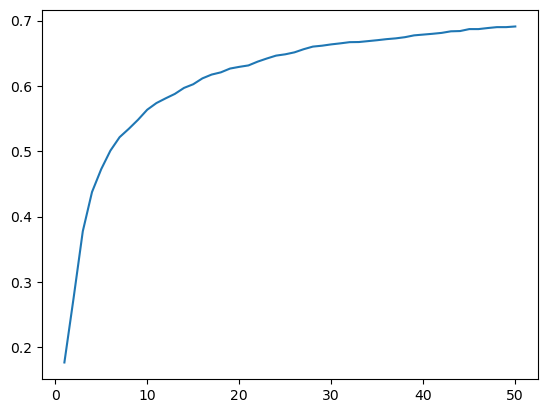

In [4]:
model = Neural_net(shape=[200,200], epochs=50, learning_rate=0.01)
model.fit(X_train, y_train, X_valid, y_valid)